In [3]:
from gprm.datasets import Seafloor
import pygmt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|#############################################| 11.1M/11.1M [00:00<?, ?B/s]
100%|###############################################| 255k/255k [00:00<?, ?B/s]
Untarring contents of 'C:\Users\siwil\AppData\Local\gprm\gprm\Cache\e76c32bfb634298f705de7f2c176943a-GSFML_SF.tbz' to 'C:\Users\siwil\AppData\Local\gprm\gprm\Cache\SeafloorFabric'


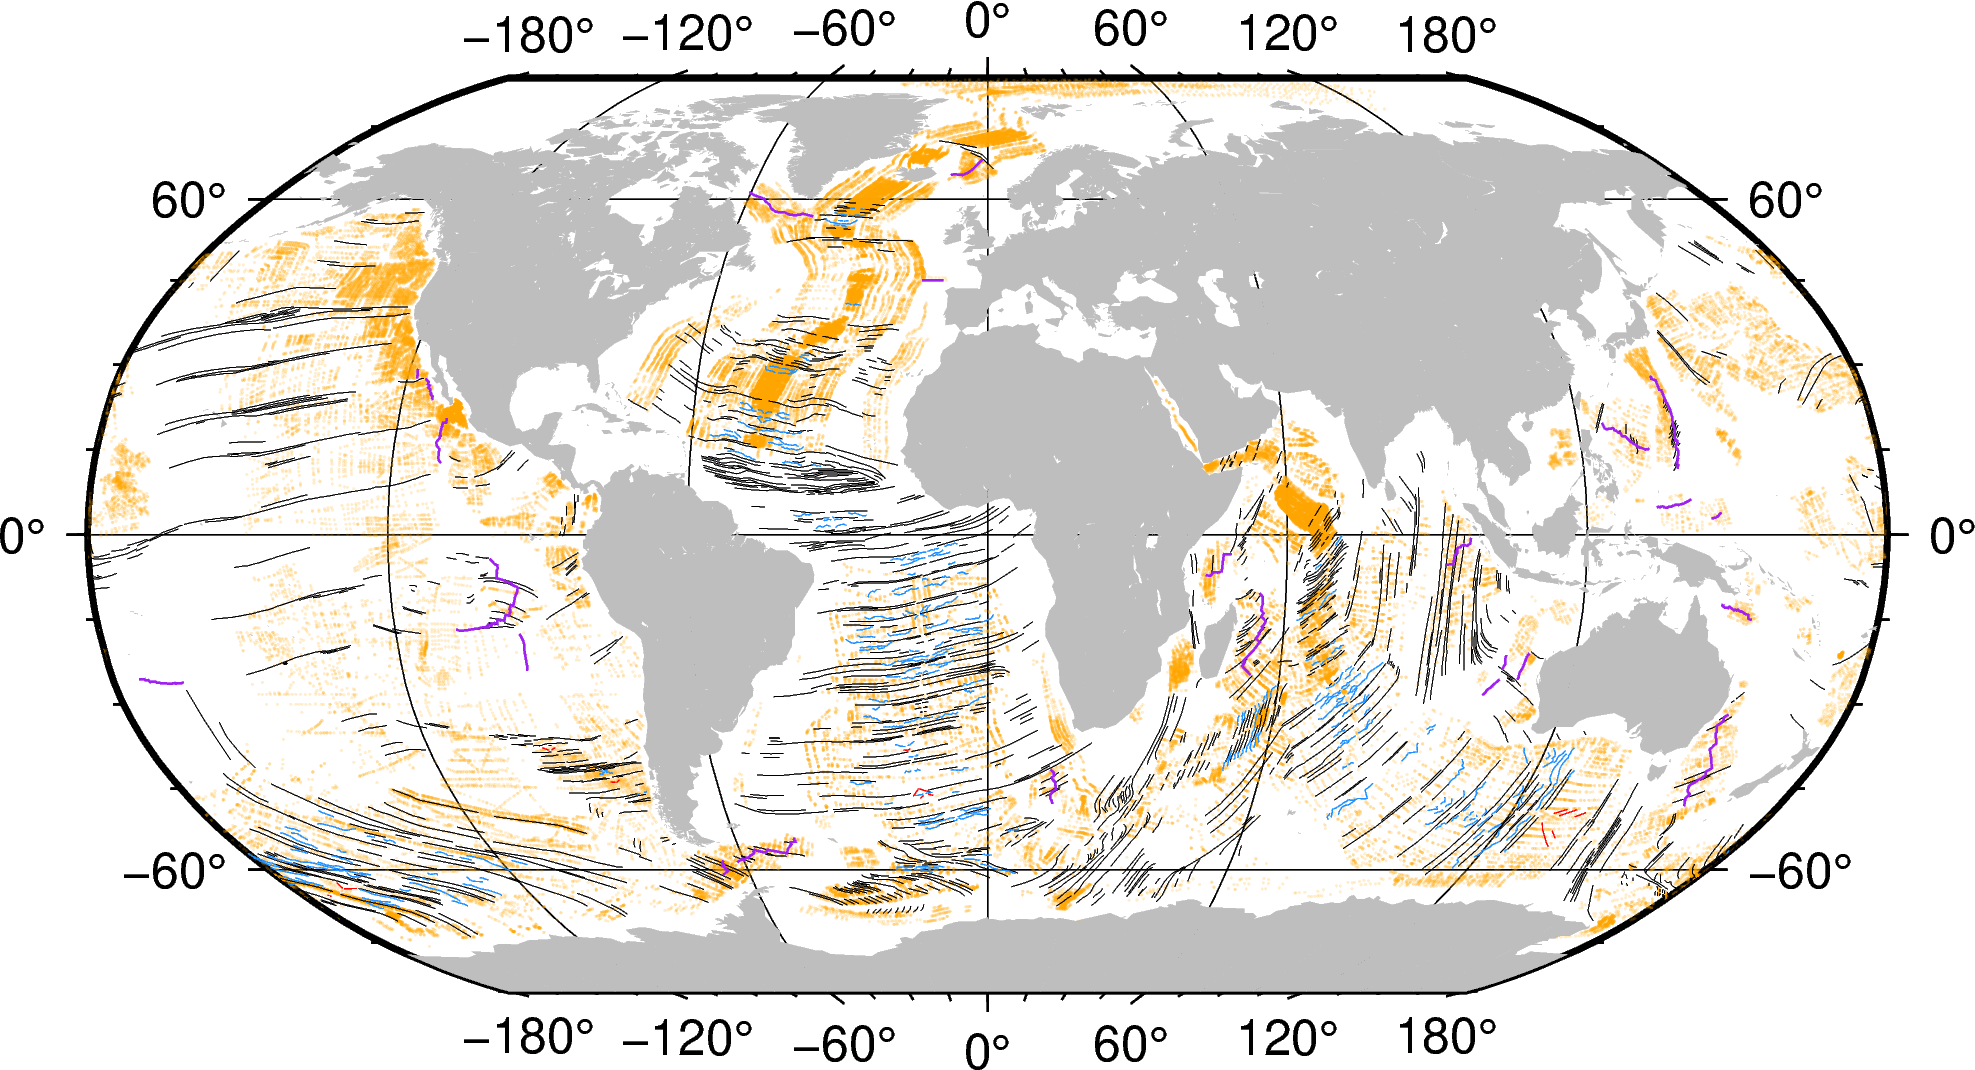

In [5]:
fig = pygmt.Figure()

fig.basemap(frame='afg', region='d', projection='N6i')

fig.coast(land='grey')
fig.plot(data=Seafloor.MagneticPicks(load=False), style='c0.02c', color='orange', transparency=80)
fig.plot(data=Seafloor.SeafloorFabric(feature_type='FZ', load=False), pen='0.1p,black')
fig.plot(data=Seafloor.SeafloorFabric(feature_type='ER', load=False), pen='0.5p,purple')
fig.plot(data=Seafloor.SeafloorFabric(feature_type='DZ', load=False), pen='0.2p,dodgerblue')
fig.plot(data=Seafloor.SeafloorFabric(feature_type='PR', load=False), pen='0.2p,red')

fig.show(width=1000)


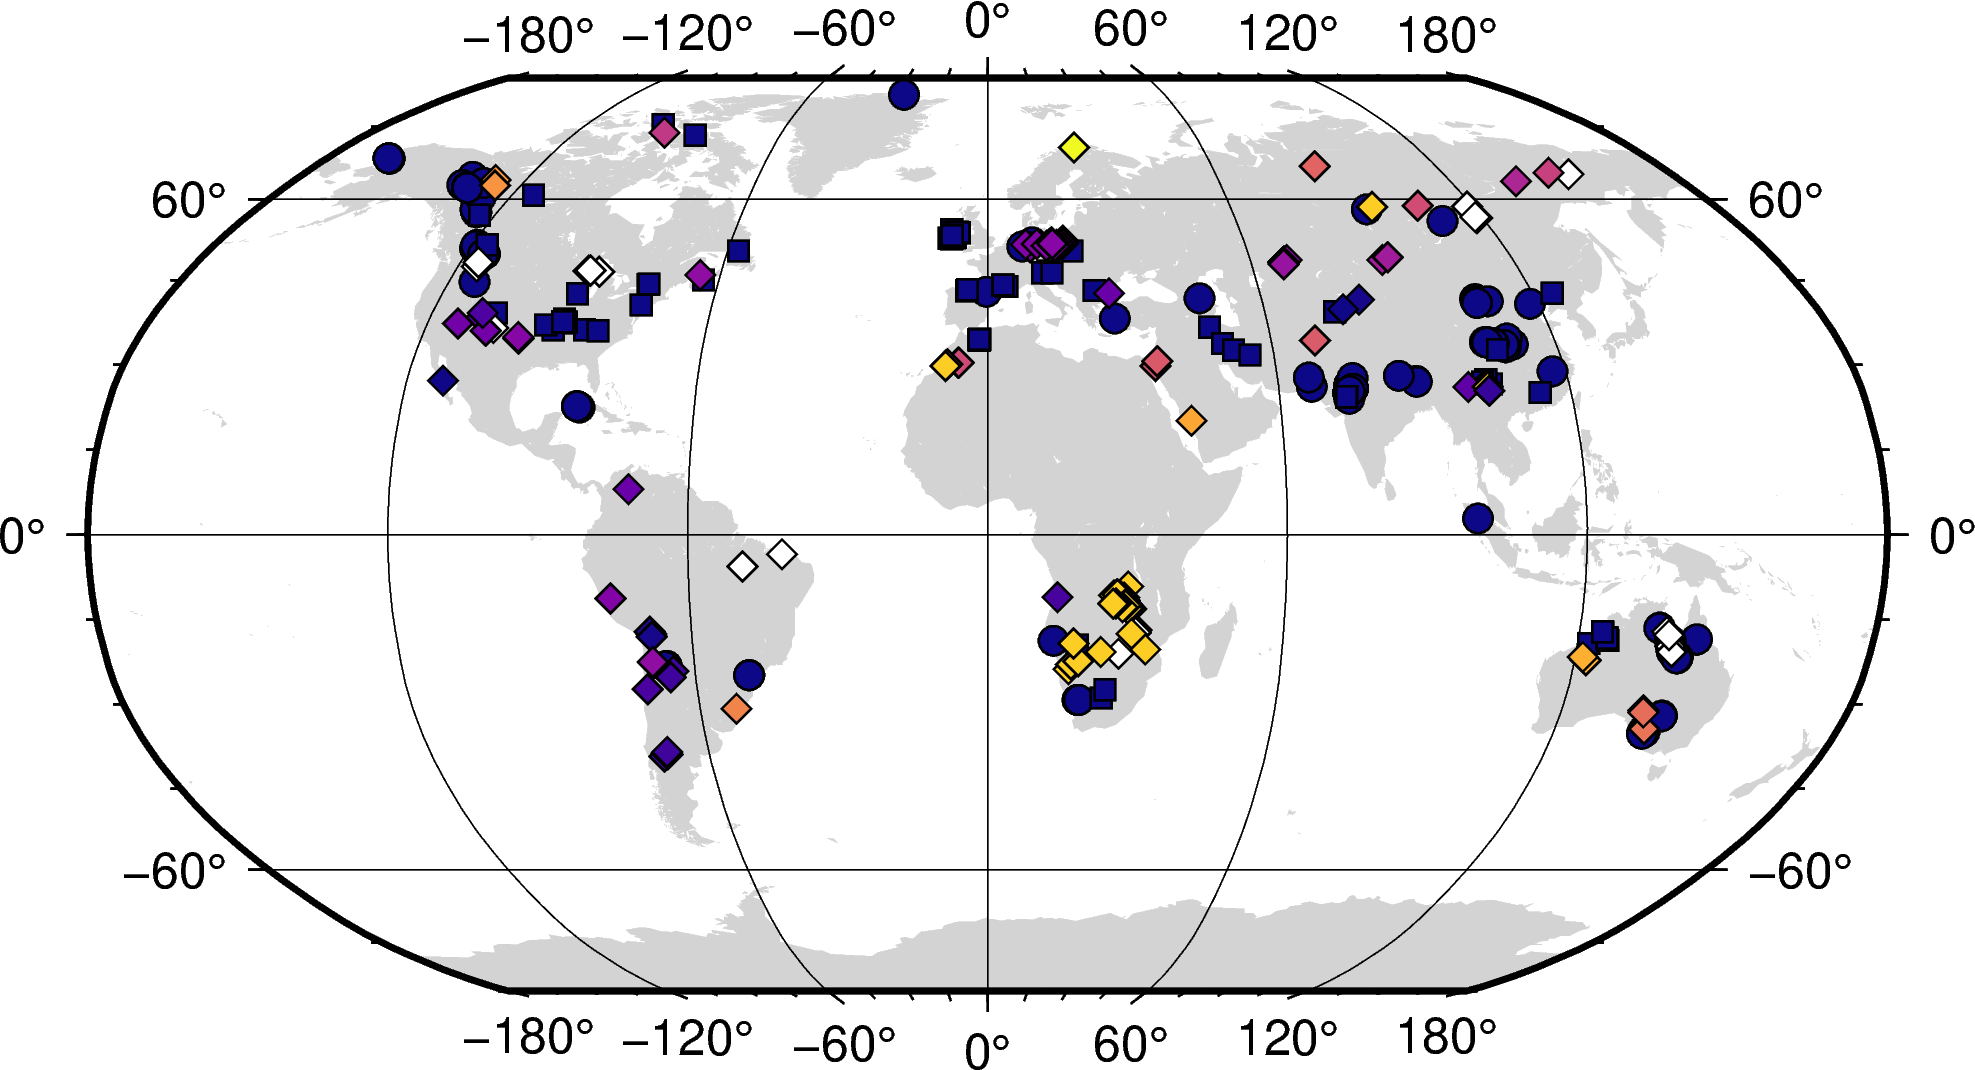

In [7]:
from gprm.datasets import Rocks


PbZn_CD = Rocks.BaseMetalDeposits('PbZn-CD')
PbZn_MVT = Rocks.BaseMetalDeposits('PbZn-MVT')
Cu_sed = Rocks.BaseMetalDeposits('Cu-sed')

fig = pygmt.Figure()
fig.coast(projection='N6i',region='d',frame='afg',land='lightgray')

fig.plot(x=PbZn_CD['Longitude'], y=PbZn_CD['Latitude'], 
         color=PbZn_CD['Age (Ga)'], style='c0.25c', cmap='plasma', pen='0.5p,black')
fig.plot(x=PbZn_MVT['Longitude'], y=PbZn_MVT['Latitude'], 
         color=PbZn_MVT['Age (Ga)'], style='s0.25c', cmap='plasma', pen='0.5p,black')
fig.plot(x=Cu_sed['Longitude'], y=Cu_sed['Latitude'], 
         color=Cu_sed['Age (Ga)'], style='d0.25c', cmap='plasma', pen='0.5p,black')

fig.show(width=1000)


In [9]:
print(Rocks.Geochem(return_column_names=True))


100%|########################################| 193M/193M [00:00<00:00, 192GB/s]


ValueError: MD5 hash of downloaded file (b4dbc981172ec214eeabb8a1a494de32-complete.zip) does not match the known hash: expected md5:9b97b54887ee7184c6650c845b4e92d4 but got 1afc7c70a0e17a1226d88ff21c094e72. Deleted download for safety. The downloaded file may have been corrupted or the known hash may be outdated.

In [5]:
data = Rocks.Geochem(usecols=['latitude', 'longitude', 'rock_name'])

data

,latitude,longitude,rock_name,geometry
0,-53.100000,73.800000,dacite,POINT (73.80000 -53.10000)
1,-53.150000,73.670000,phonolite,POINT (73.67000 -53.15000)
2,-53.080000,73.670000,phonolite,POINT (73.67000 -53.08000)
3,-53.150000,73.670000,phonolite,POINT (73.67000 -53.15000)
4,33.421055,130.398294,marble,POINT (130.39829 33.42106)
...,...,...,...,...
1022087,-72.500000,11.500000,charnockite,POINT (11.50000 -72.50000)
1022088,-72.500000,11.500000,charnockite,POINT (11.50000 -72.50000)
1022089,-72.500000,11.500000,charnockite,POINT (11.50000 -72.50000)
1022090,-72.500000,11.500000,charnockite,POINT (11.50000 -72.50000)


<GeoAxesSubplot:>

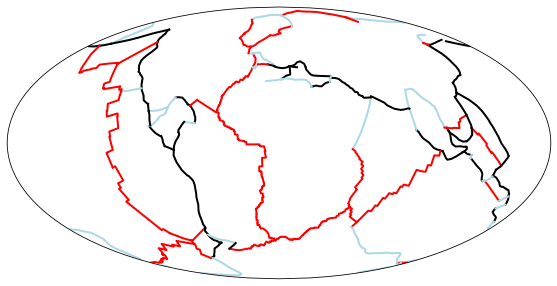

In [22]:
from gprm.datasets import Reconstructions

M2016 = Reconstructions.fetch_Muller2016()

tmp = M2016.plate_snapshot(50)
tmp.plot()

<GeoAxesSubplot:>

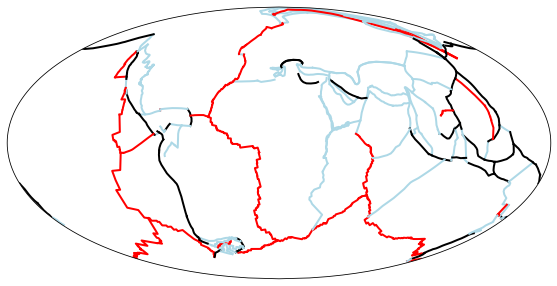

In [21]:
M2019 = Reconstructions.fetch_Muller2019()

tmp = M2019.plate_snapshot(20)
tmp.plot()

<GeoAxesSubplot:>

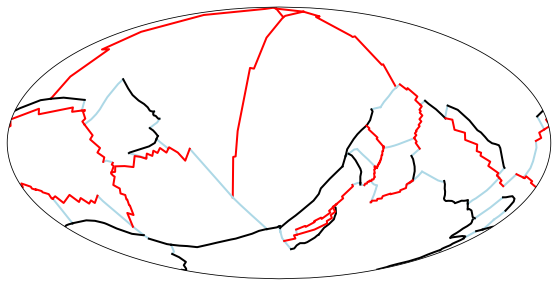

In [20]:
M2021 = Reconstructions.fetch_Merdith2021()

tmp = M2021.plate_snapshot(550)
tmp.plot()

100%|#####################################| 9.78M/9.78M [00:00<00:00, 9.79GB/s]
Unzipping contents of 'C:\Users\siwil\AppData\Local\gprm\gprm\Cache\e539df4ddd9ad6134dcf44e7a9f4976d-Matthews_etal_2016_Global_Plate_Model_GPC.zip' to 'C:\Users\siwil\AppData\Local\gprm\gprm\Cache\Matthews2016'


<GeoAxesSubplot:>

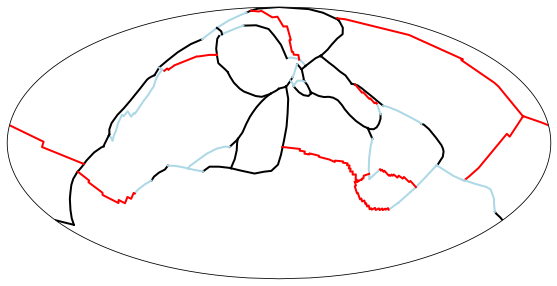

In [13]:
Ma2016 = Reconstructions.fetch_Matthews2016()

tmp = Ma2016.plate_snapshot(350, anchor_plate_id=0)
tmp.plot()

100%|#####################################| 4.06M/4.06M [00:00<00:00, 4.05GB/s]
Unzipping contents of 'C:\Users\siwil\AppData\Local\gprm\gprm\Cache\d1c5d618fc664a13a9787ac7649a17a3-Young_etal_2018_GeoscienceFrontiers_GPlatesPlateMotionModel.zip' to 'C:\Users\siwil\AppData\Local\gprm\gprm\Cache\Y2019'


<GeoAxesSubplot:>

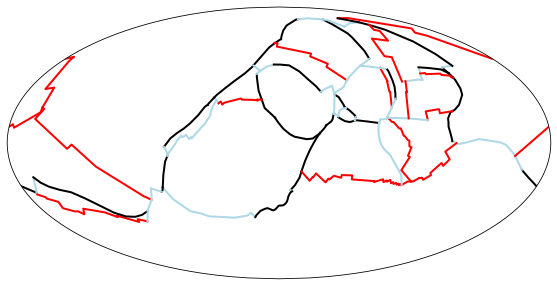

In [23]:
Y2019 = Reconstructions.fetch_Young2019()

tmp = Y2019.plate_snapshot(350, anchor_plate_id=0)
tmp.plot()

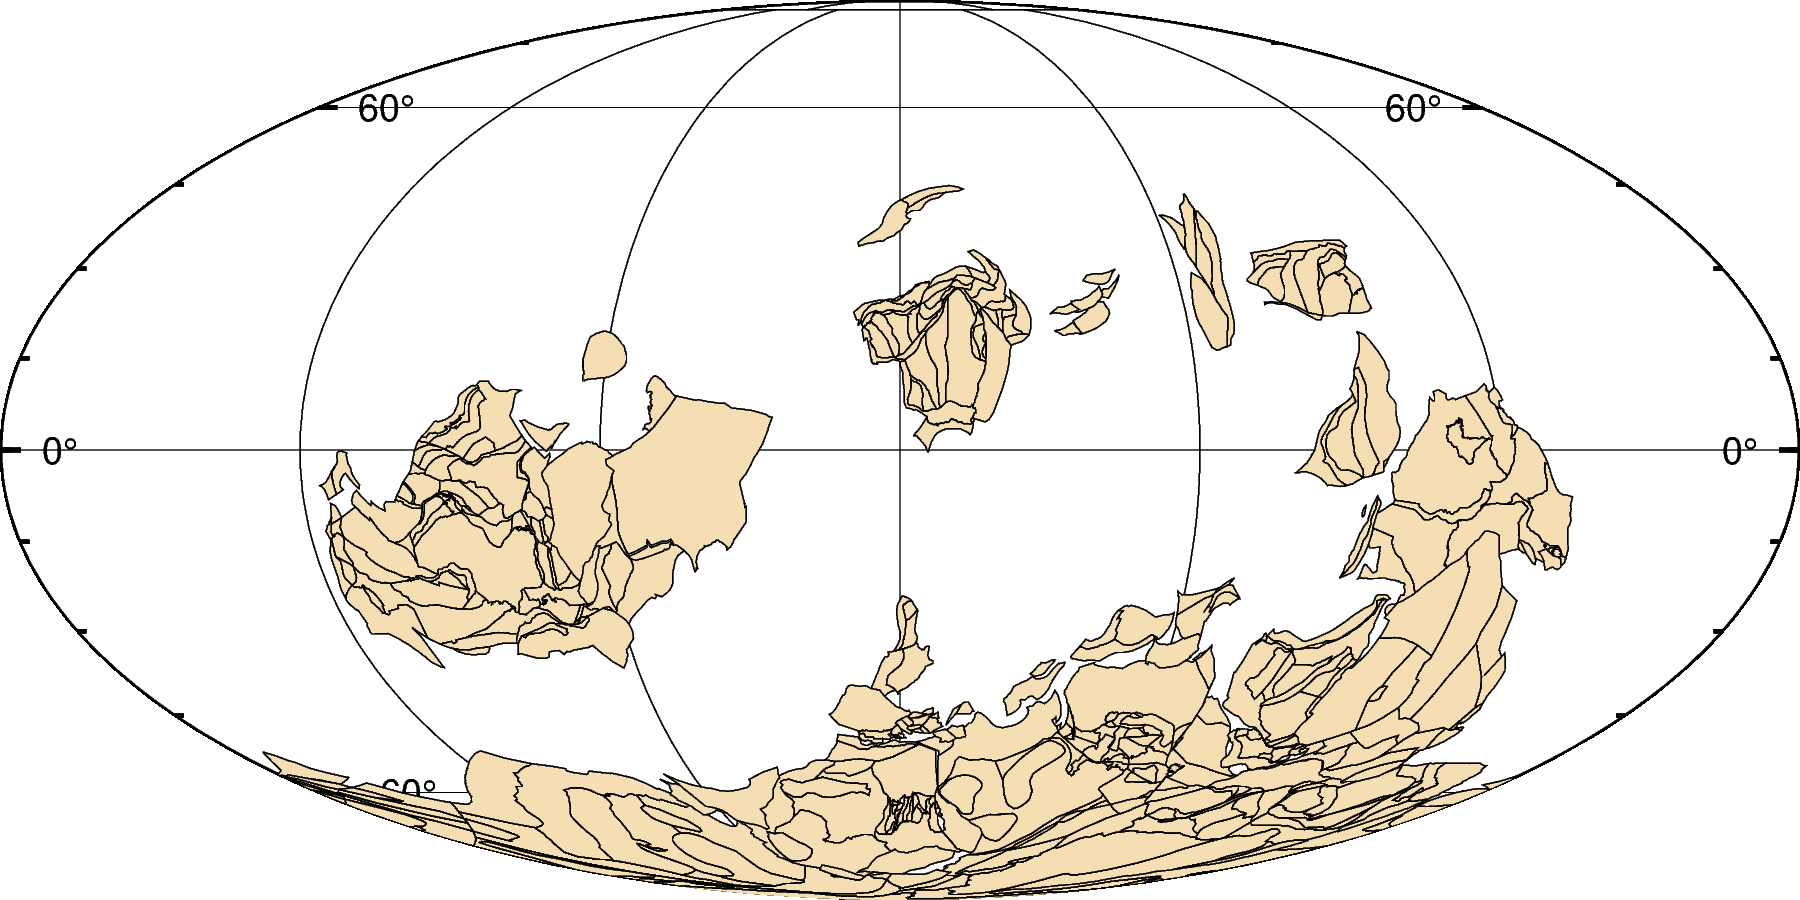

In [11]:
reconstruction_time = 420.
reconstructed_continents = M2021.polygon_snapshot('continents', reconstruction_time)
#reconstructed_plates = M2021.plate_snapshot(reconstruction_time)

fig = pygmt.Figure()
fig.basemap(region='d', projection='W6i', frame='afg')
reconstructed_continents.plot2(fig, color='wheat')
#reconstructed_plates.plot_subduction_zones(fig)
#reconstructed_plates.plot_mid_ocean_ridges(fig)
#reconstructed_plates.plot_other_boundaries(fig)
fig.show(width=800)


100%|#####################################| 8.20k/8.20k [00:00<00:00, 8.20MB/s]


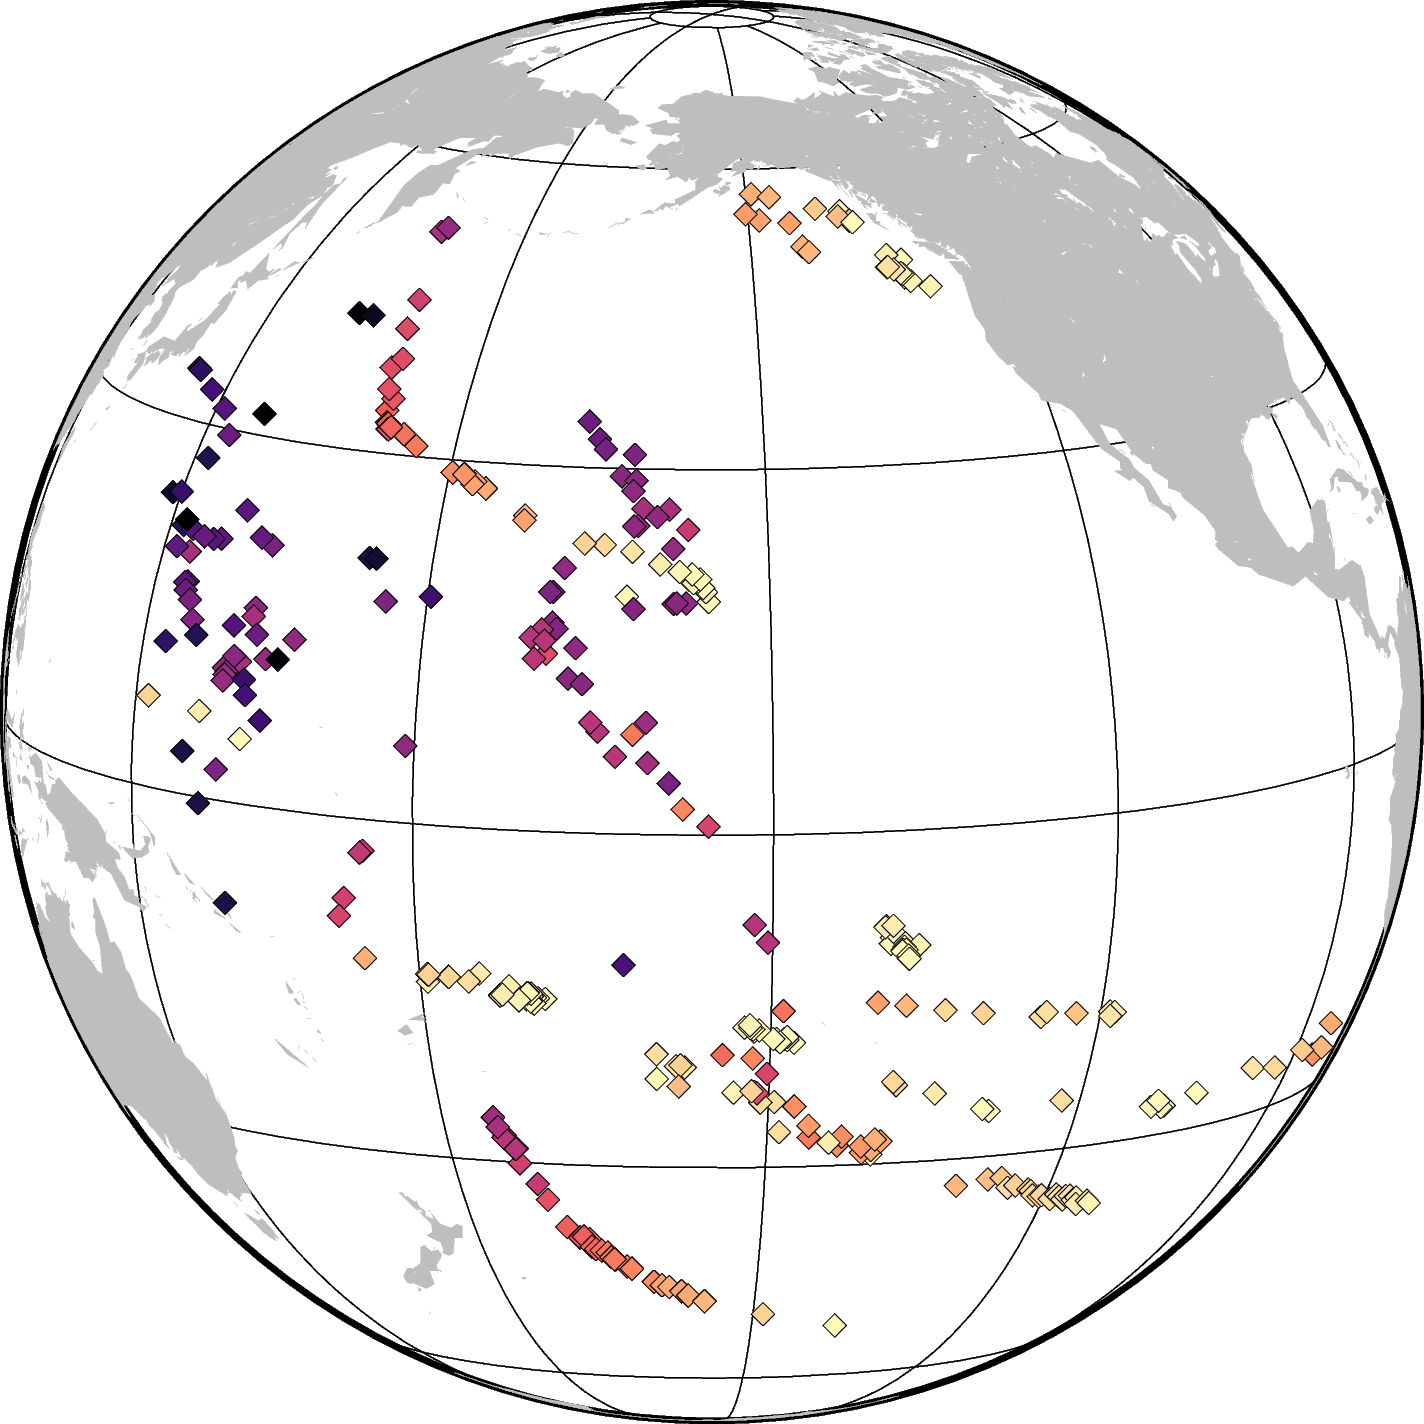

In [24]:
PacificSeamountAges = Seafloor.PacificSeamountAges()

fig = pygmt.Figure()

fig.basemap(frame='afg', region='d', projection='G-155/10/12c')

fig.coast(land='grey')
pygmt.makecpt(cmap='magma', series='0/140/2', reverse=True)
fig.plot(x=PacificSeamountAges.Long, y=PacificSeamountAges.Lat, 
         color = PacificSeamountAges.Average_Age_Ma, 
         style='d0.2c',
         cmap=True,
         pen='0.05p,black',)

fig.show(width=700)


100%|#####################################| 1.81M/1.81M [00:00<00:00, 1.81GB/s]


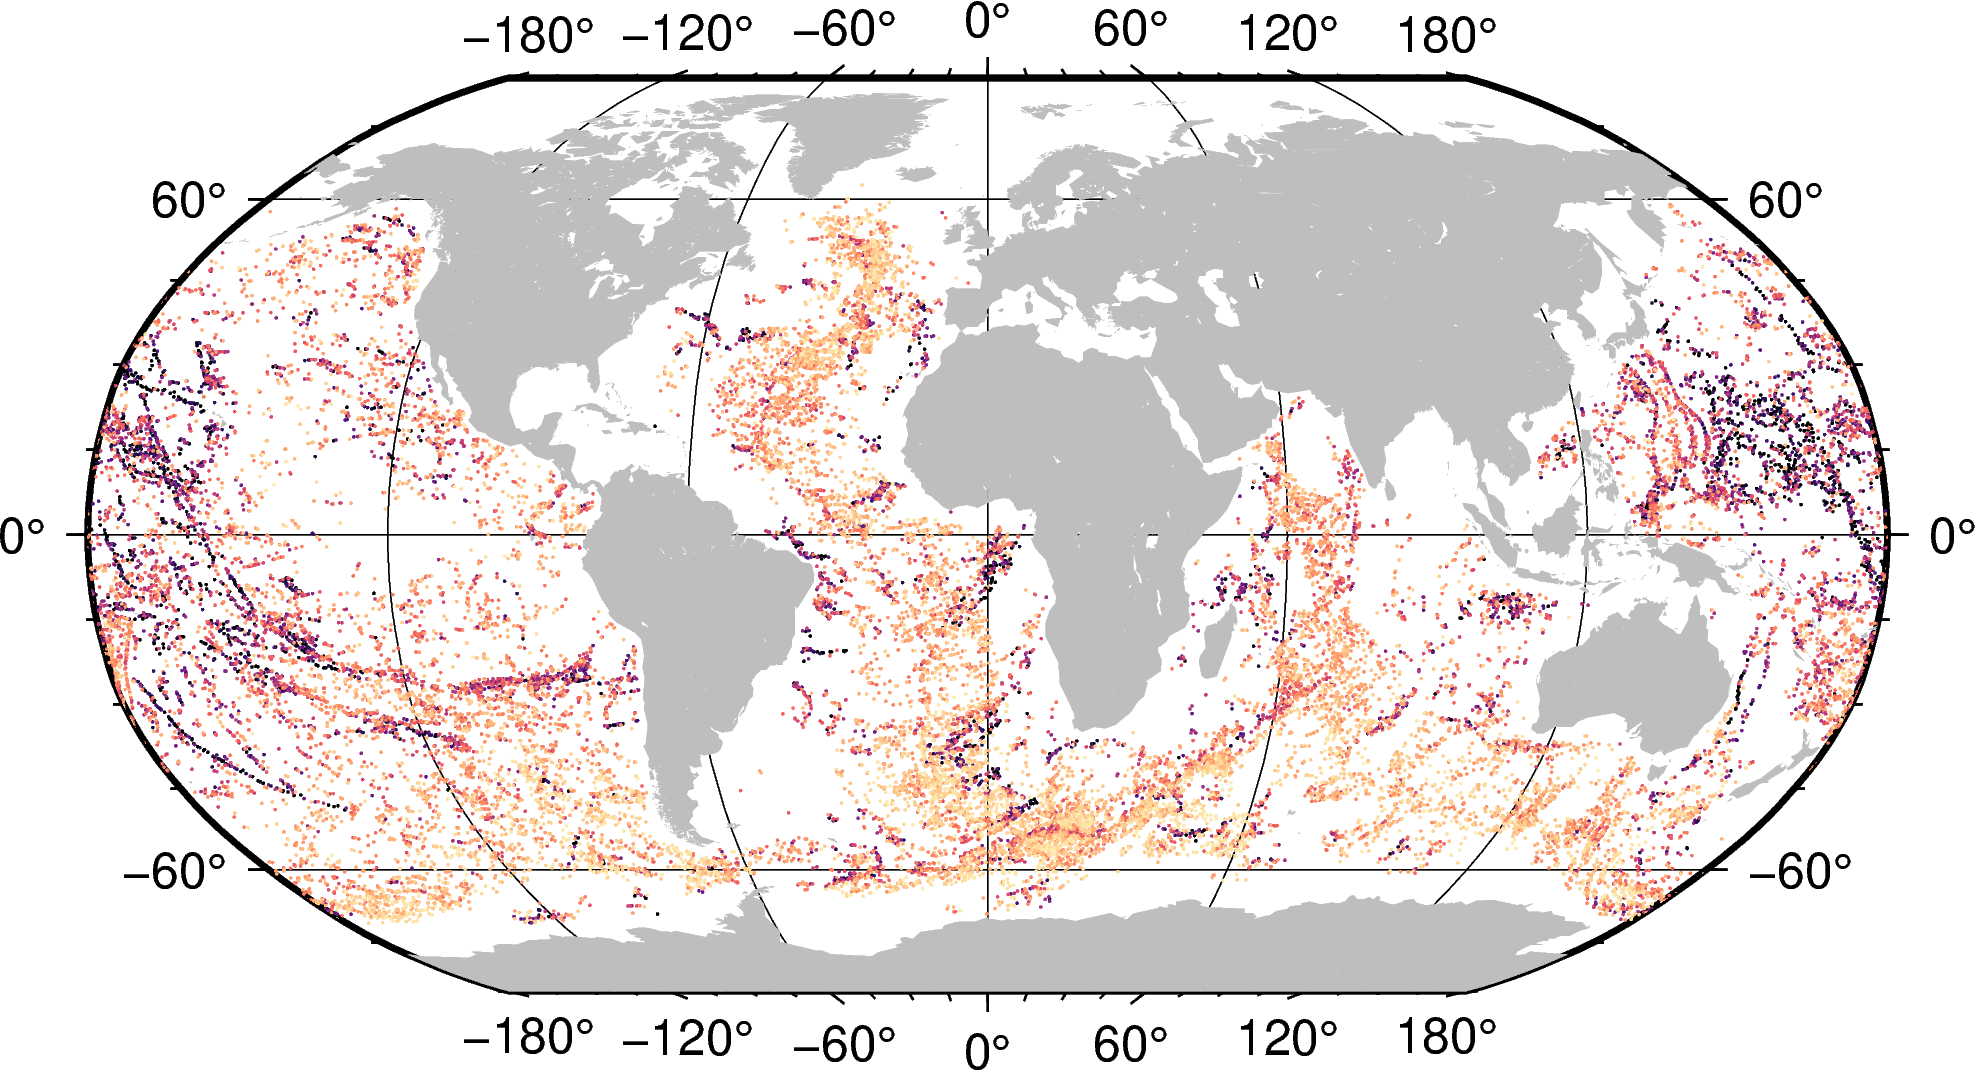

In [26]:
Seamounts = Seafloor.Seamounts()

fig = pygmt.Figure()

fig.basemap(frame='afg', region='d', projection='N6i')

fig.coast(land='grey')
pygmt.makecpt(cmap='magma', series='0/3000', reverse=True)
fig.plot(x=Seamounts.Long, y=Seamounts.Lat, 
         color = Seamounts.Height, 
         style='c0.025c',
         cmap=True,)

fig.show(width=900)


100%|#####################################| 6.49M/6.49M [00:00<00:00, 4.72GB/s]


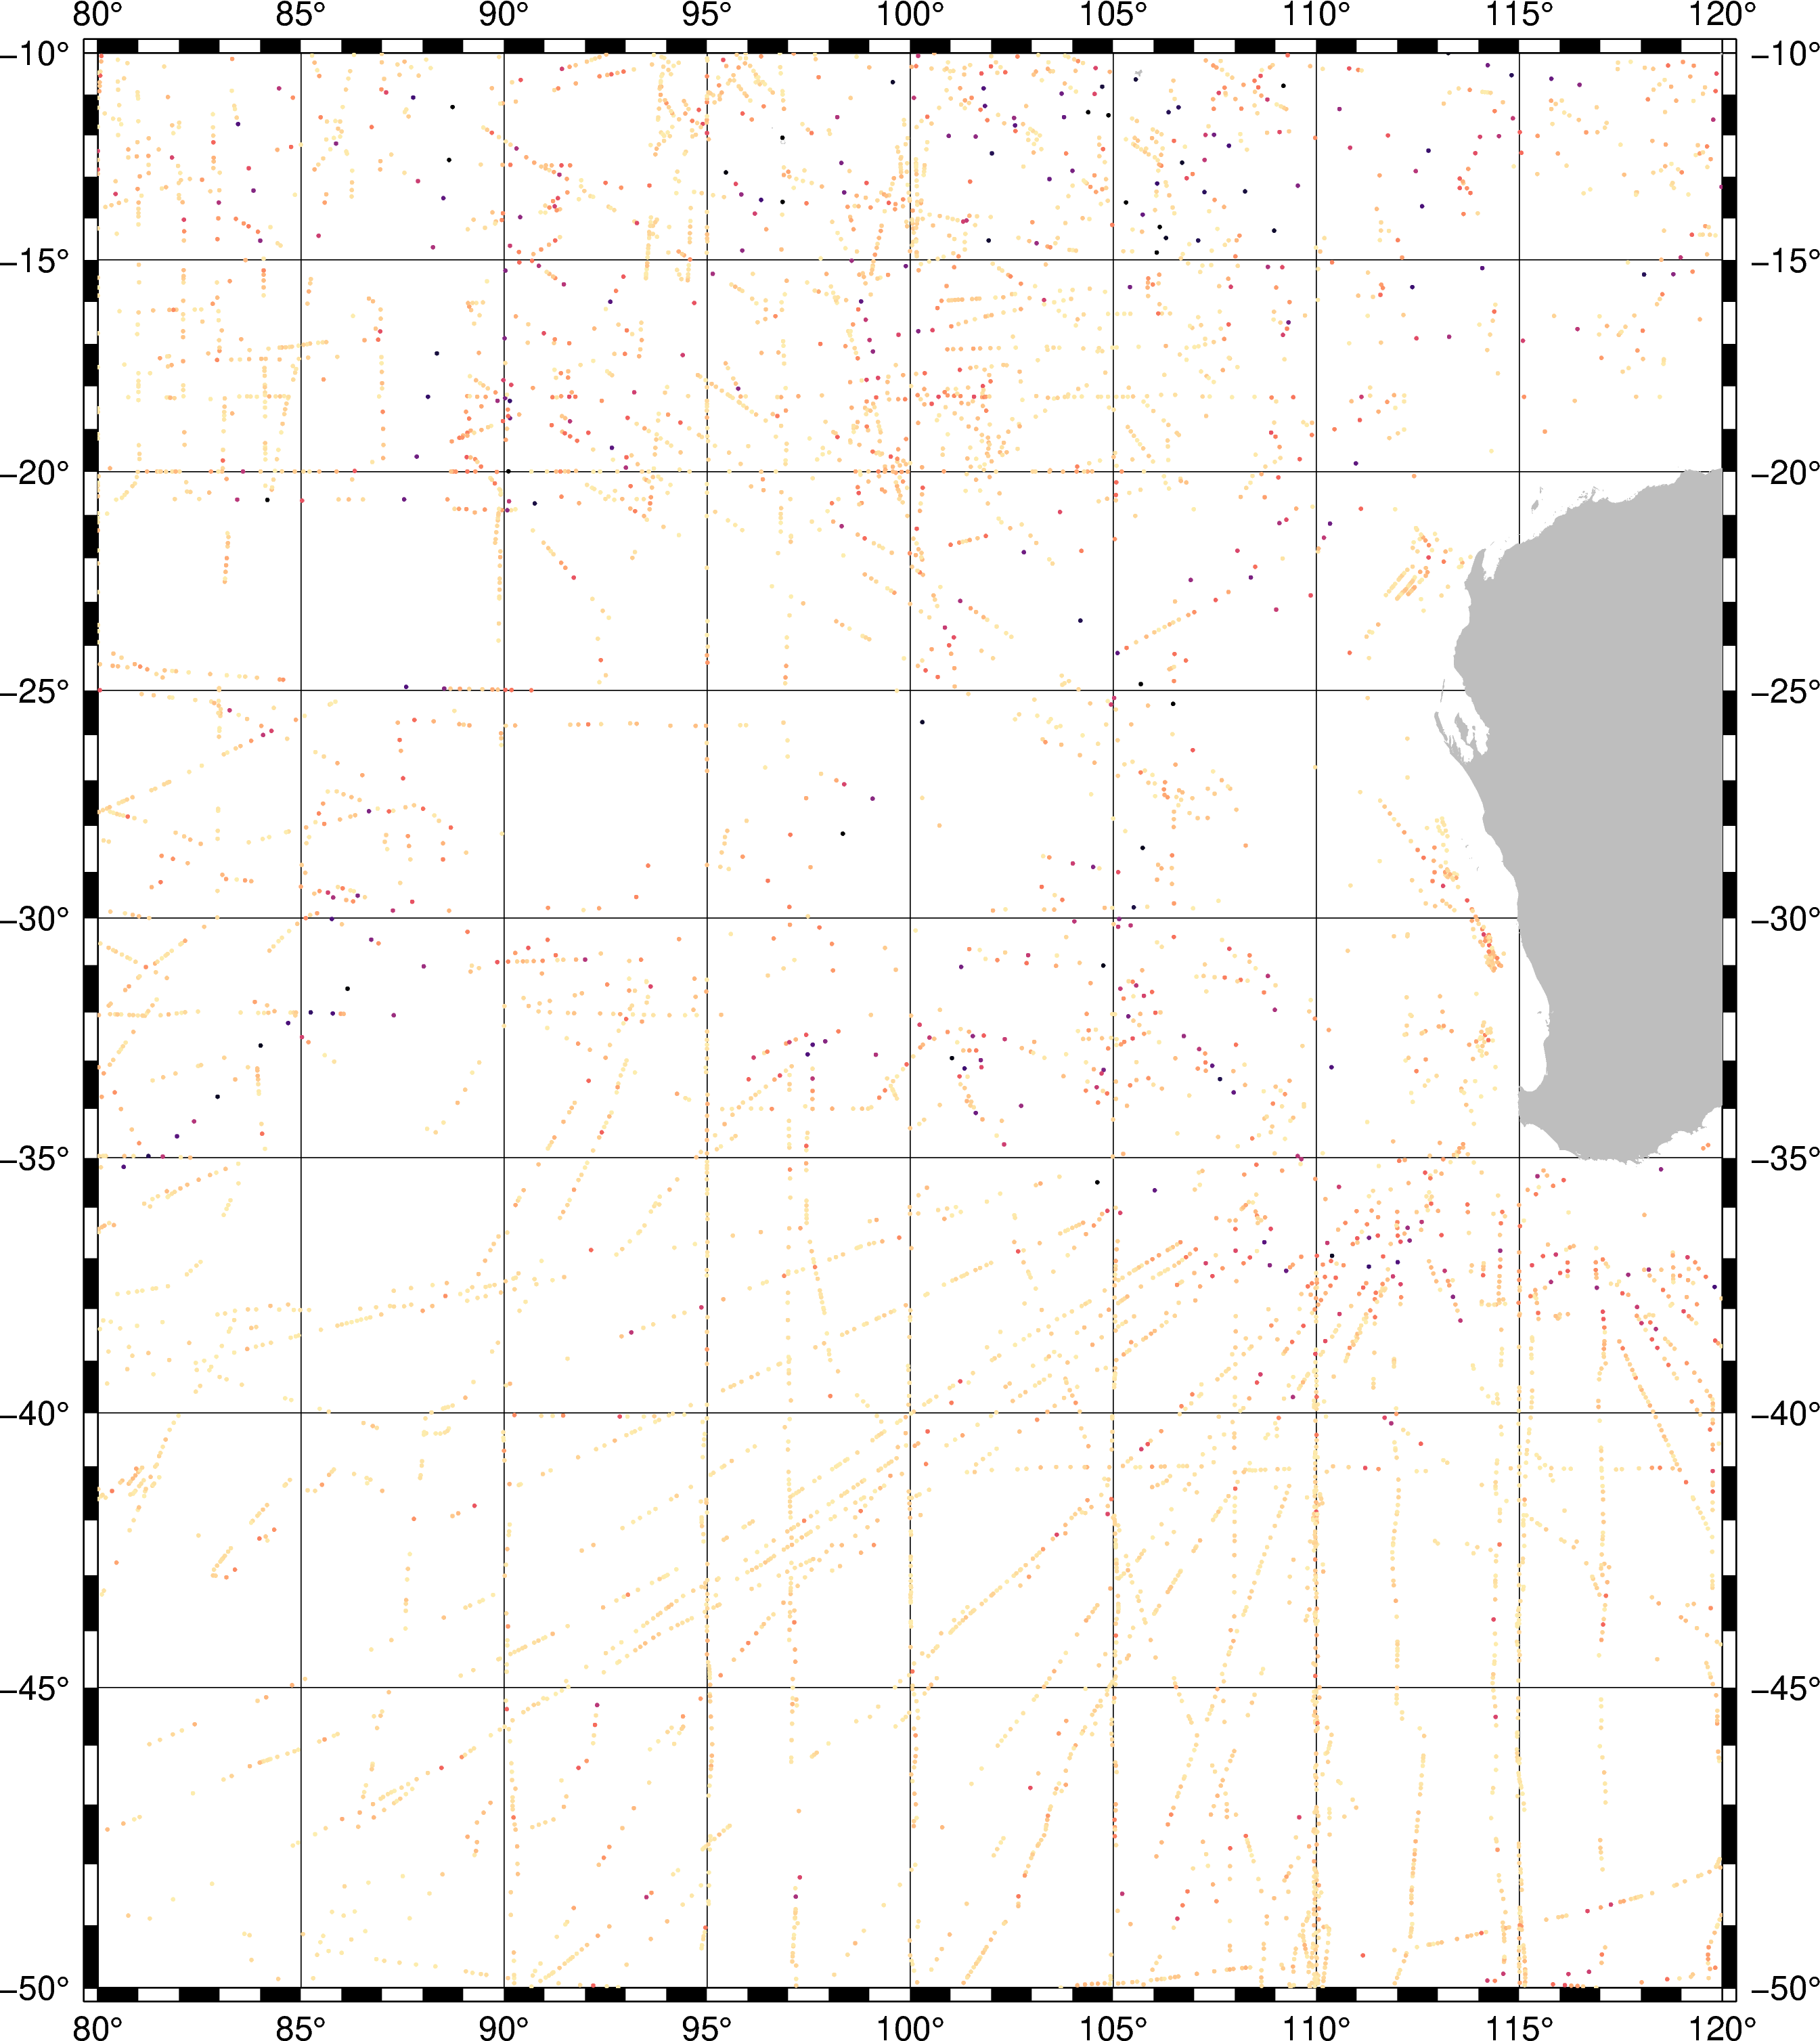

In [27]:
Seamounts = Seafloor.Seamounts(catalogue='HW')

fig = pygmt.Figure()

#fig.basemap(frame='afg', region='d', projection='N12i')
fig.basemap(frame='afg', region='80/120/-50/-10', projection='M8i')

fig.coast(land='grey')
pygmt.makecpt(cmap='magma', series='0/3000', reverse=True)
fig.plot(x=Seamounts.Long, y=Seamounts.Lat, 
         color = Seamounts.Height, 
         style='c0.05c',
         cmap=True,)

fig.show(width=1000)


100%|#####################################| 3.95M/3.95M [00:00<00:00, 4.16GB/s]
Unzipping contents of 'C:\Users\siwil\AppData\Local\gprm\gprm\Cache\9dff70a63ee287a3d43c3dfab3ba81dd-LargeIgneousProvinces_VolcanicProvinces.zip' to 'C:\Users\siwil\AppData\Local\gprm\gprm\Cache\LIPs'
100%|#####################################| 2.58M/2.58M [00:00<00:00, 2.57GB/s]


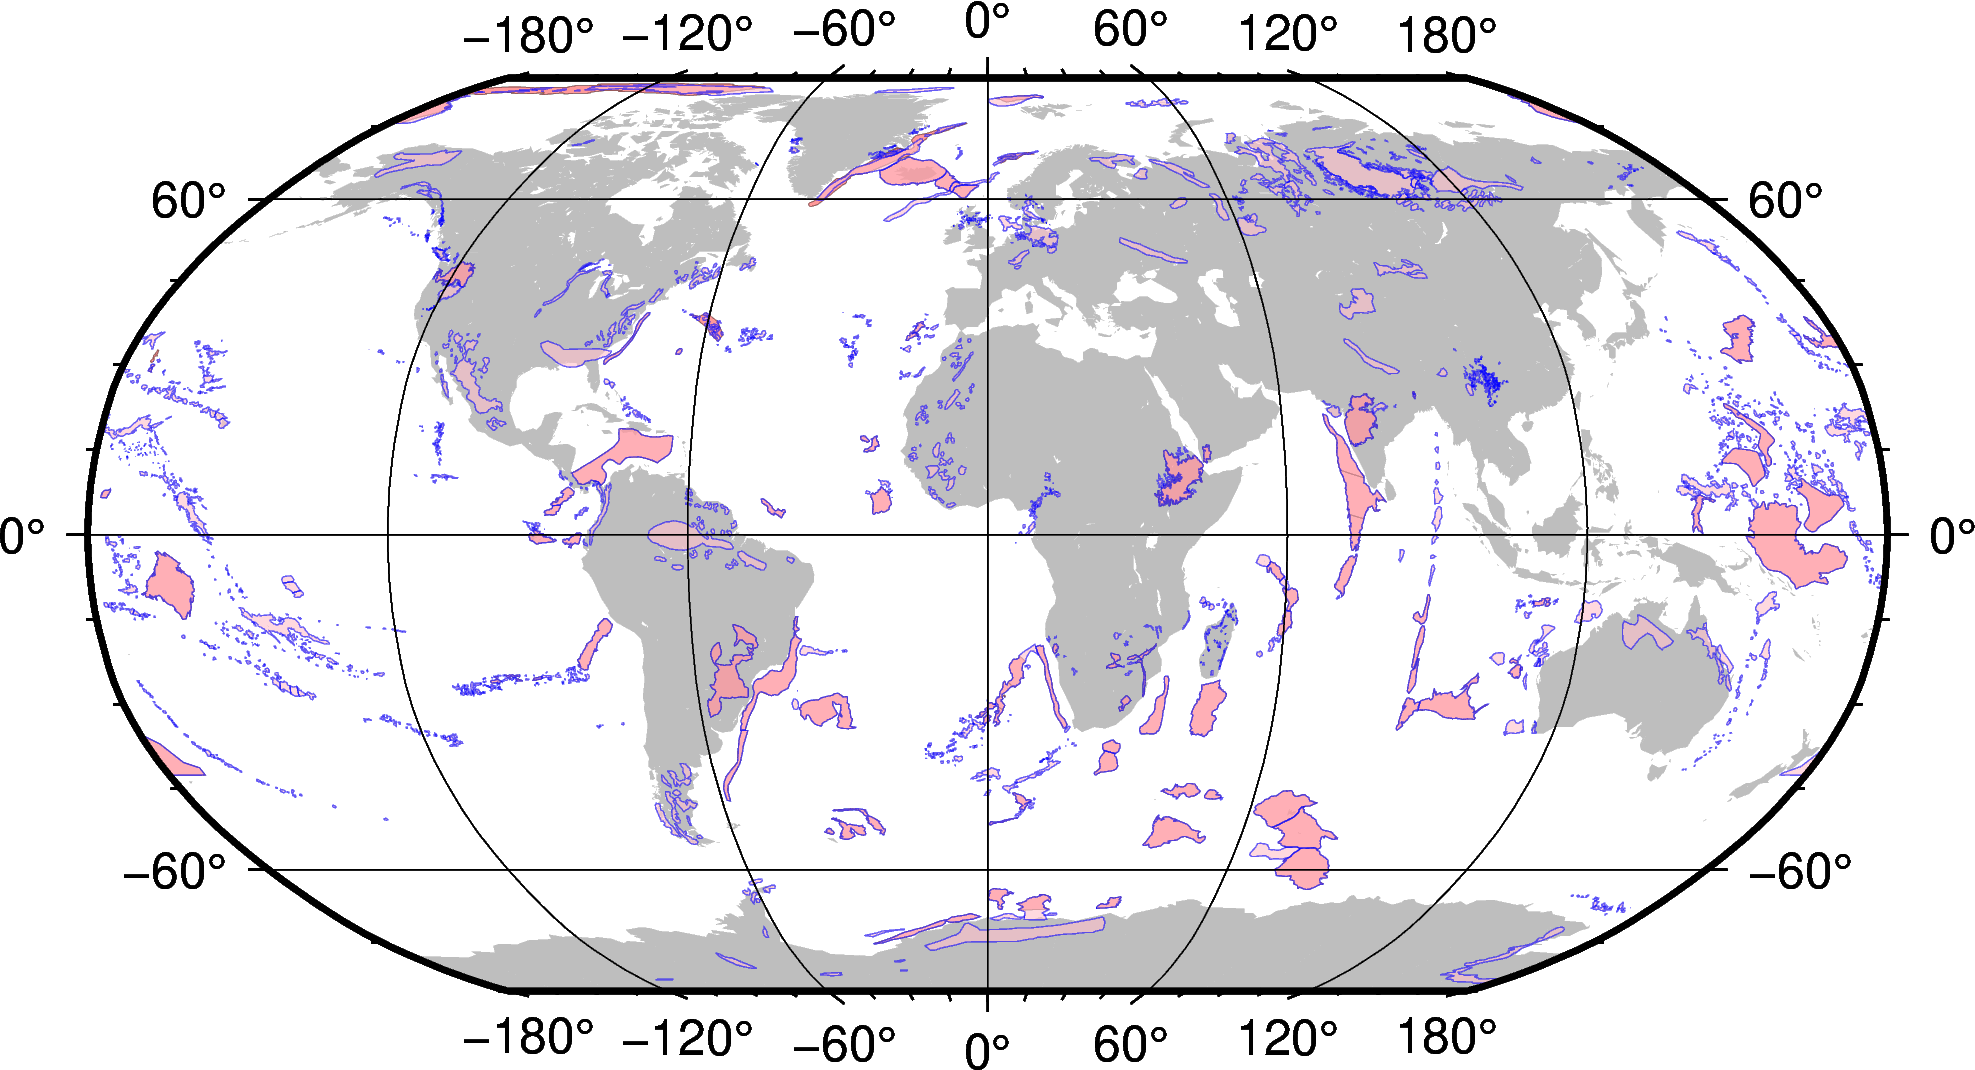

In [28]:
LIPs = Seafloor.LargeIgneousProvinces(load=False)
LIPs2 = Seafloor.LargeIgneousProvinces(load=False, catalogue='Johansson')
LIPs3 = Seafloor.LargeIgneousProvinces(load=False, catalogue='UTIG')
fig = pygmt.Figure()

fig.basemap(frame='afg', region='d', projection='N6i')

fig.coast(land='grey')
fig.plot(data=LIPs, color='red', pen='0.1p,black', transparency=60)
fig.plot(data=LIPs2, color='pink', transparency=40)
fig.plot(data=LIPs2, pen='0.2p,blue', transparency=40)
fig.basemap(frame='afg')
fig.show(width=900)


In [30]:
from gprm.datasets import Zircons

df_SampleDetails, df_Data = Zircons.loadDB()



100%|###############################################| 144M/144M [00:00<?, ?B/s]


ValueError: too many values to unpack (expected 2)

In [ ]:
SedimentaryZircons = Zircons.get_sedimentary_samples(df_SampleDetails,df_Data)
IgneousZircons = Zircons.get_igneous_samples(df_SampleDetails,df_Data)

In [ ]:
fig = pygmt.Figure()

fig.basemap(frame='afg', region='d', projection='N6i')
fig.coast(land='grey')
#fig.plot(x=IgneousZircons.Longitude, y=IgneousZircons.Latitude,
#         style='c0.1c', color='red', pen='0.02p,black', transparency=60)
fig.plot(x=SedimentaryZircons.Longitude, y=SedimentaryZircons.Latitude,
         style='c0.1c', color=SedimentaryZircons['Est_Depos_Age_Ma']/1000., pen='0.02p,black', transparency=60, cmap='magma')
fig.basemap(frame='afg')

fig.show(width=900)



0.00B [00:00, ?B/s]    


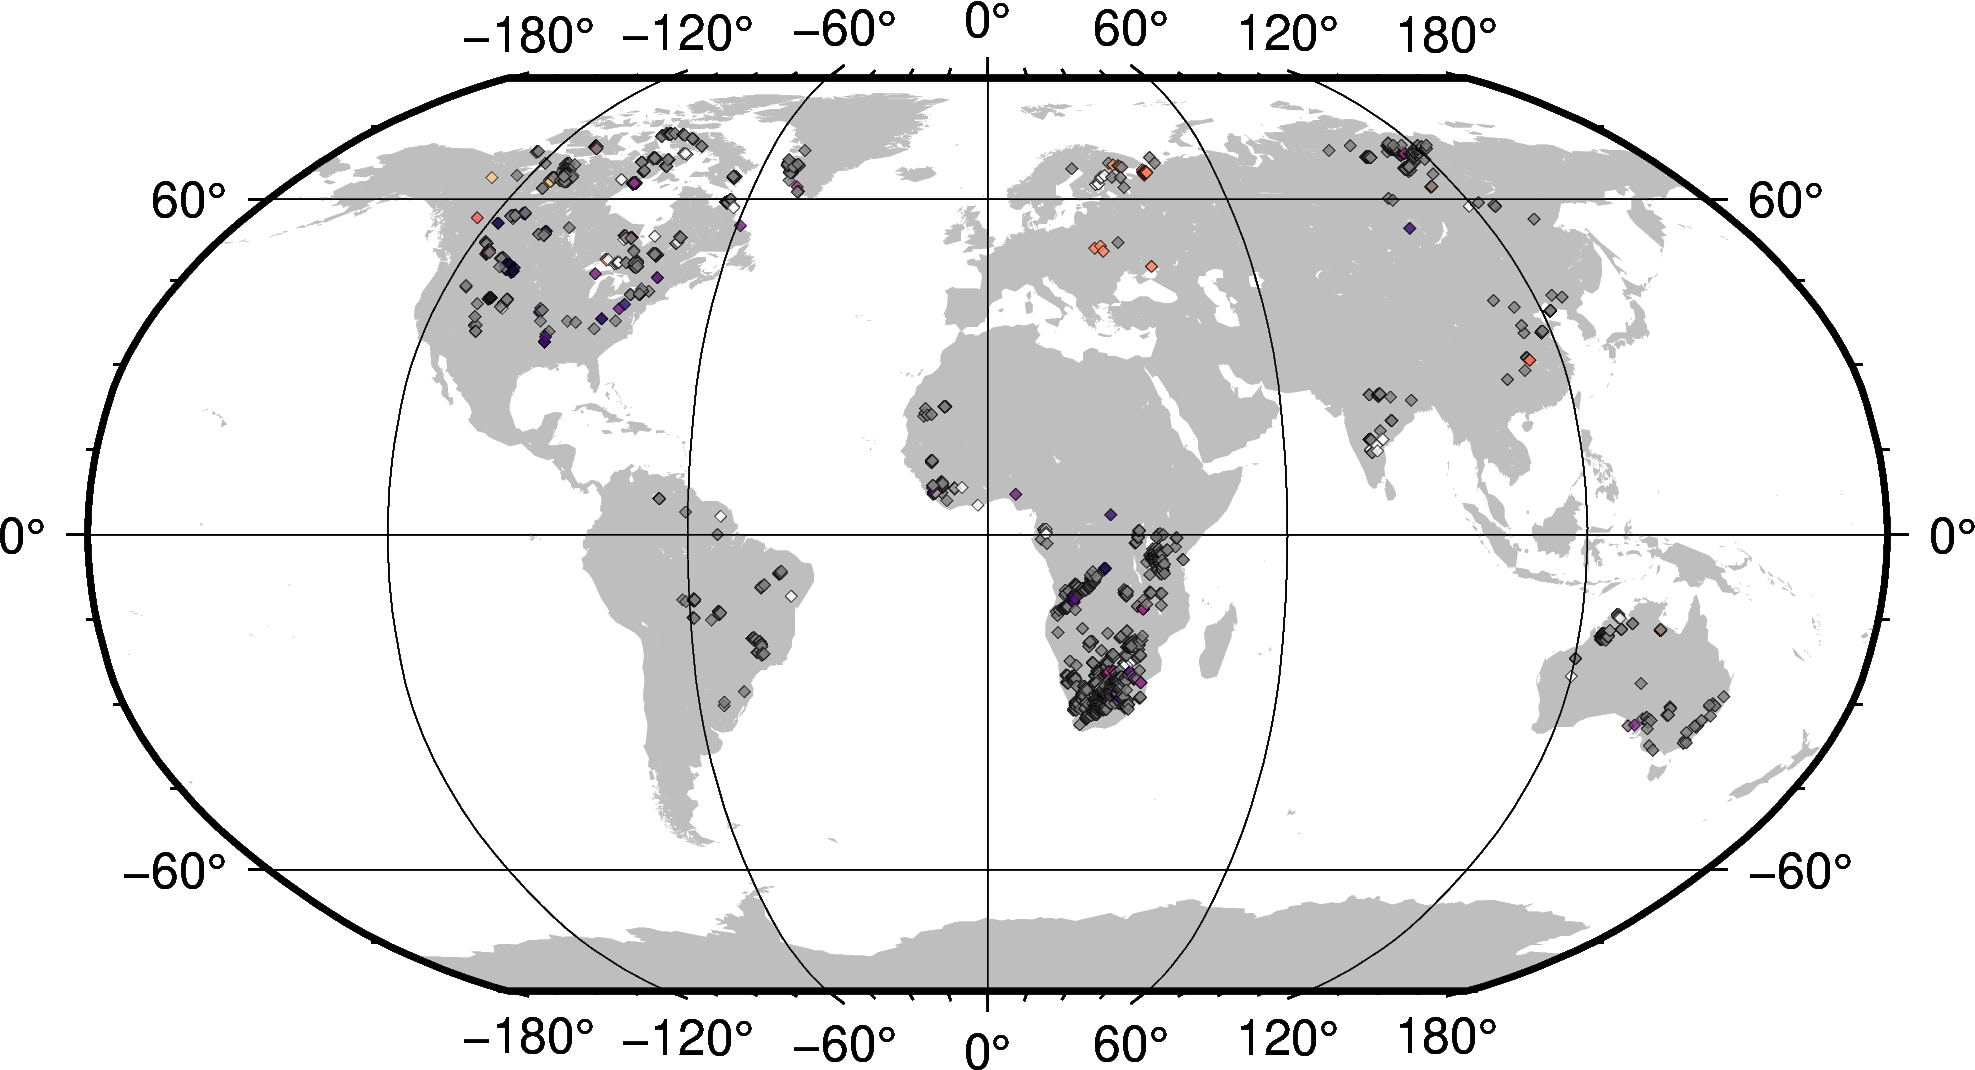

In [29]:
kimberlites = Rocks.Kimberlites()

fig = pygmt.Figure()

fig.basemap(frame='afg', region='d', projection='N6i')

fig.coast(land='grey')
fig.plot(x=kimberlites.Longitude, y=kimberlites.Latitude,
         style='d0.1c', color=kimberlites.Age1_Ma/500., pen='0.1p,black', cmap='magma', transparency=20)
fig.basemap(frame='afg')
fig.show(width=900)
